In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

ERROR 1: PROJ: proj_create_from_database: Open of /accounts/awindled/.conda/envs/custom/share/proj failed


In [2]:
import earthaccess

/accounts/awindled/.conda/envs/custom/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
auth = earthaccess.login(persist=True)


In [4]:
results = earthaccess.search_data(short_name="PACE_OCI_L3M_RRS_NRT", 
                                  granule_name="*.MO.*")

Granules found: 12


In [85]:
iop_results = earthaccess.search_data(short_name="PACE_OCI_L3M_IOP_NRT", 
                                  granule_name="*.MO.*",
                                  temporal=("2024-05-01", "2024-05-31"), 
                                  )

Granules found: 39


In [5]:
paths = earthaccess.open(results)
paths

Opening 12 granules, approx size: 7.47 GB


QUEUEING TASKS | : 100%|██████████| 12/12 [00:00<00:00, 2777.53it/s]
PROCESSING TASKS | : 100%|██████████| 12/12 [00:05<00:00,  2.36it/s]
COLLECTING RESULTS | : 100%|██████████| 12/12 [00:00<00:00, 104206.31it/s]


[<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V1_0_0.Rrs_442.1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V1_0_0.Rrs.1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V1_0_0.Rrs_442.0p1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V1_0_0.Rrs_442.4km.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V1_0_0.Rrs.0p1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240401_20240430.L3m.MO.RRS.V1_0_0.Rrs.4km.NRT.nc>,
 <

In [86]:
iop_paths = earthaccess.open(iop_results)
iop_paths

Opening 39 granules, approx size: 0.85 GB


QUEUEING TASKS | : 100%|██████████| 39/39 [00:00<00:00, 8089.50it/s]
PROCESSING TASKS | : 100%|██████████| 39/39 [00:04<00:00,  8.86it/s]
COLLECTING RESULTS | : 100%|██████████| 39/39 [00:00<00:00, 100292.98it/s]


[<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.adg_442.1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.adg_s.1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.a.0p1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.bbp_442.1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.bbp_s.1deg.NRT.nc>,
 <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.adg_unc_442.0p1deg.NRT

In [88]:
print(iop_paths[2])
print(iop_paths[

<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.IOP.V1_0_0.a.0p1deg.NRT.nc>


In [6]:
print(paths[6])
may_month = xr.open_dataset(paths[6])
may_month

<File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240501_20240531.L3m.MO.RRS.V1_0_0.Rrs.1deg.NRT.nc>


<xarray.Dataset>
Dimensions:     (wavelength: 184, lat: 180, lon: 360, rgb: 3, eightbitcolor: 256)
Coordinates:
  * wavelength  (wavelength) float64 339.0 341.0 344.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float32 ...
    palette     (rgb, eightbitcolor) uint8 ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

CPU times: user 71.1 ms, sys: 3.7 ms, total: 74.8 ms
Wall time: 1.09 s


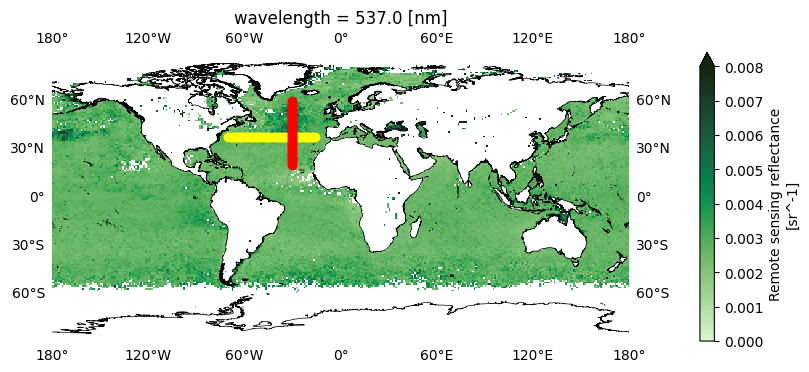

In [706]:
%%time
myproj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6), layout='compressed', subplot_kw={'projection': myproj})

may_month.Rrs[:,:,80].plot(vmin=0, vmax=0.008, cmap=cmocean.cm.algae)
axs.coastlines(resolution='10m', linewidth=0.5)
axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color="None")
#axs.set(xlabel=None, ylabel=None)
axs.set_aspect('equal')
axs.axis('off')

lat_line = np.repeat(37.5, 55)
lon_line = np.arange(-70, -15)
axs.plot(lon_line, lat_line, marker='o', color='yellow')

lat_line2 = np.arange(20, 60.5)
lon_line2 = np.repeat(-30.5, 41)
axs.plot(lon_line2, lat_line2, marker='o', color='red')




(55, 184)
(102, 184)


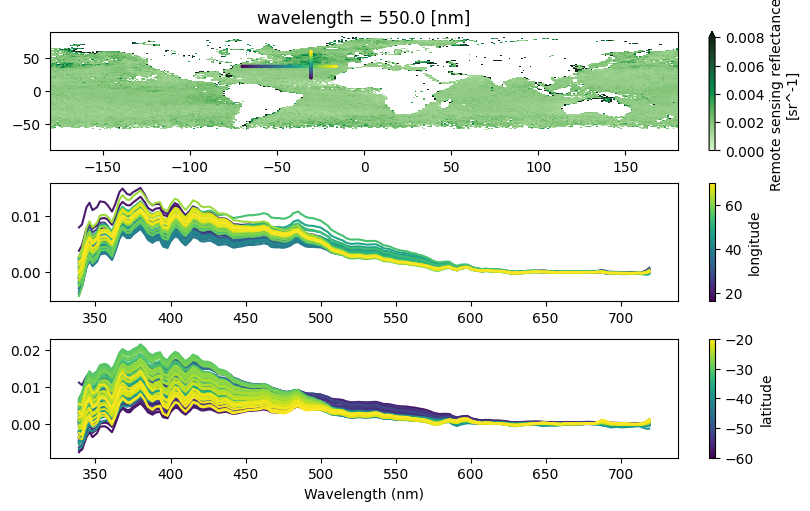

In [707]:
pixels = may_month.sel(lat=37.5, lon=slice(-70, -15))
print(pixels.Rrs.shape)
n = len(pixels.Rrs)
colors = plt.cm.viridis(np.linspace(0,1,n))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(-lon_line), vmax=max(-lon_line)))

myproj = ccrs.PlateCarree()
fig, axs = plt.subplots(3,1, figsize=(8,5), layout='compressed')

may_month.Rrs[:,:,85].plot(ax=axs[0], vmin=0, vmax=0.008, cmap=cmocean.cm.algae)
#axs[0].coastlines(resolution='10m', linewidth=0.5)
#axs[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color="None")
axs[0].set(xlabel=None, ylabel=None)
#axs[0].set_aspect('equal')
#axs[0].axis('off')

lat_line = np.repeat(37.5, 55)
lon_line = np.arange(-70, -15)

axs[0].scatter(lon_line, lat_line, c=lon_line, s=2, marker='o', cmap=plt.cm.viridis)

lat_line2 = np.arange(20, 60.5)
lon_line2 = np.repeat(-30.5, 41)
axs[0].scatter(lon_line2, lat_line2, c=lat_line2, s=2, marker='o', cmap=plt.cm.viridis)

for i in range(len(pixels.Rrs)):
    axs[1].plot(pixels.wavelength, pixels.Rrs[i], color=colors[i])
    #axs[1].set_ylabel('Remote sensing reflectance (sr^-1)')
plt.colorbar(sm, label='longitude', ax=axs[1])

pixels2 = may_month.sel(lat=slice(60.5, -40.5), lon=-30.5)
print(pixels2.Rrs.shape)

n2 = len(pixels2.Rrs)
colors2 = plt.cm.viridis(np.linspace(0,1,n2))
sm2 = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(-lat_line2), vmax=max(-lat_line2)))

for i in range(len(pixels2.Rrs)):
    axs[2].plot(pixels2.wavelength, pixels2.Rrs[i], color=colors2[i])
    #axs[2].set_ylabel('Remote sensing reflectance (sr^-1)')
    axs[2].set_xlabel('Wavelength (nm)')
plt.colorbar(sm2, label='latitude', ax=axs[2])

plt.savefig('/glusteruser/awindled/PCC_OASIM_figs/PACE_Rrs.png', dpi=300) 


CPU times: user 16.6 s, sys: 3.87 s, total: 20.5 s
Wall time: 10min 57s


(-180.0, 180.0, -90.0, 90.0)

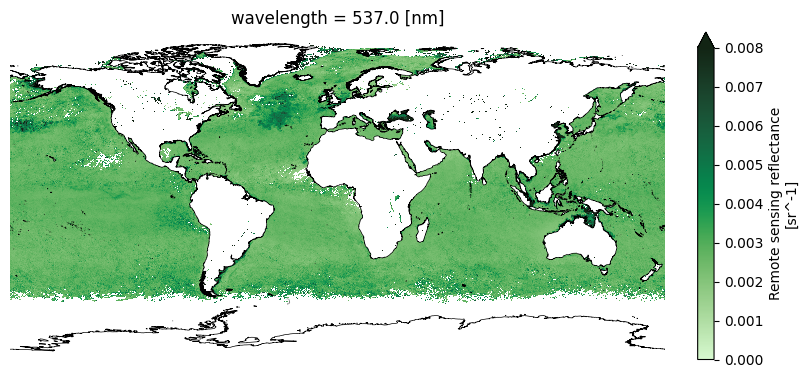

In [395]:
%%time 
myproj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6), layout='compressed', subplot_kw={'projection': myproj})

may_month_0p1.Rrs[:,:,80].plot(vmin=0, vmax=0.008, cmap=cmocean.cm.algae)
axs.coastlines(resolution='10m', linewidth=0.5)
#axs.set(xlabel=None, ylabel=None)
#axs.set_aspect('equal')
axs.axis('off')

(31365, 179)
(31365, 179)
(179, 179)


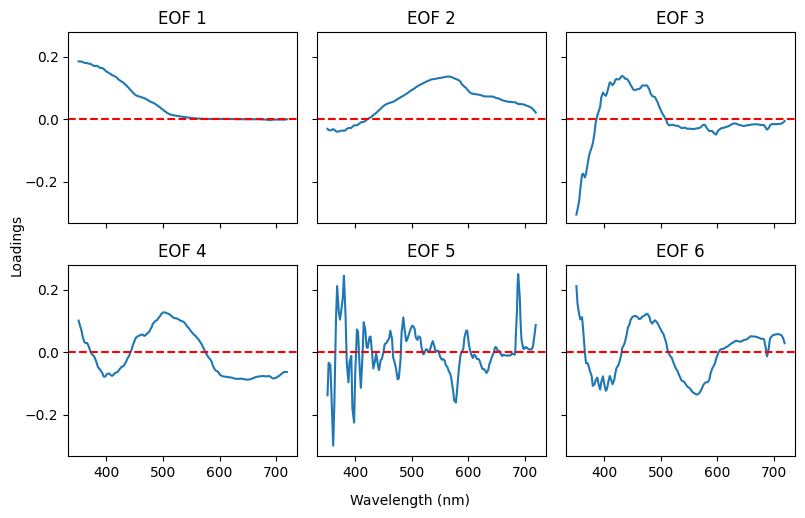

In [617]:
may_month['Rrs_norm'] = (may_month.Rrs - may_month.Rrs.mean()) / may_month.Rrs.std()

may_month_norm_stacked = may_month.Rrs_norm.stack(z=("lat", "lon"))
may_month_norm_stacked_no_nans = may_month_norm_stacked.dropna(dim='z', how='all')

may_month_norm_stacked_no_nans = np.array(np.swapaxes(may_month_norm_stacked_no_nans, 0, 1))
print(may_month_norm_stacked_no_nans.shape)

from sklearn.decomposition import PCA

# Create and fit the PCA model
pca = PCA() 
scores = pca.fit_transform(may_month_norm_stacked_no_nans)
print(scores.shape) #U #scores 
loadings = pca.components_
print(loadings.shape)

# Plots of the first 9 principal component loadings
fig, axs = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey=True)
axs = axs.flatten()
wavelength = may_month.wavelength

for i in range(6):
    axs[i].plot(wavelength, pca.components_[i, :], linestyle="-", marker="", label=f"PC{i+1}")
    axs[i].axhline(0, linestyle="--", color="red")
    #axs[i].set_xlabel("Wavelength (nm)")
    #axs[i].set_ylabel("Loadings")
    axs[i].set_title(f"EOF {i+1}")
    '''
    #axs[i].scatter([343.4, 360.5,380.2,446.7,477.3,532.2,577.2,630.0],
                    #[0,0,0,0,0,0,0,0], color='red')

    axs[i].scatter(435, 0, color='green', label='Tchla') #Tchla
    axs[i].scatter(452, 0, color='purple', label='DVchla') #DVchla
    axs[i].scatter(461, 0, color='orange', label='Chlc1+c2') #Chlc1+c2
    axs[i].scatter(464, 0, color='yellow', label='Tchlb') #Tchlb
    axs[i].scatter(476, 0, color='purple', label='DVchlb') #DVchlb
    axs[i].scatter(490, 0, color='red', label='PPC') 
    axs[i].scatter(586, 0, color='orange') #Chlc1+c2
    axs[i].scatter(602, 0, color='purple') #DVchlb
    axs[i].scatter(636, 0, color='orange') #Chlc1+c2
    axs[i].scatter(654, 0, color='purple') #DVchlb
    '''

fig.text(0.5, -0.02, 'Wavelength (nm)', ha='center')
fig.text(0, 0.5, 'Loadings', va='center', rotation='vertical')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

                        
plt.tight_layout()
plt.show()


#343.4,360.5,380.2,446.7,477.3,532.2,577.2,630.0

In [587]:
np.around(pca.explained_variance_[0:8], 1)

array([59.2,  8.3,  4.4,  0.8,  0.4,  0.2,  0.1,  0. ])

In [31]:
rrs_xds = xr.open_dataset('/glusteruser/awindled/ALL_NOBM_OASIM_data_2020_w_EOF.nc', decode_times=False)
rrs_xds

<xarray.Dataset>
Dimensions:         (months: 12, lat: 234, lon: 288, wavelength: 401)
Coordinates:
  * months          (months) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
  * lat             (lat) float32 -84.0 -83.33 -82.67 -82.0 ... 70.0 70.67 71.33
  * lon             (lon) float32 -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * wavelength      (wavelength) int64 350 351 352 353 354 ... 747 748 749 750
    wv              (wavelength) int64 ...
Data variables: (12/57)
    tot             (months, lat, lon) float32 ...
    chl             (months, lat, lon) float32 ...
    dia             (months, lat, lon) float32 ...
    coc             (months, lat, lon) float32 ...
    cya             (months, lat, lon) float32 ...
    din             (months, lat, lon) float32 ...
    ...              ...
    EOF_3           (months, lat, lon) float64 ...
    EOF_4           (months, lat, lon) float64 ...
    EOF_5           (months, lat, lon) float64 ...
    EOF_6           (months, lat, lon) float64 ...
    EOF_7           (months, lat, lon) float64 ...
    EOF_8           (months, lat, lon) float64 ...

In [53]:
may_month = xr.open_dataset(paths[6])
may_month

<xarray.Dataset>
Dimensions:     (wavelength: 184, lat: 180, lon: 360, rgb: 3, eightbitcolor: 256)
Coordinates:
  * wavelength  (wavelength) float64 339.0 341.0 344.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float32 ...
    palette     (rgb, eightbitcolor) uint8 ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

In [8]:
may_month = may_month.interp_like(rrs_xds.wavelength, method='linear')
may_month

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, wavelength: 401, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat         (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * wavelength  (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float64 nan nan nan nan ... nan nan nan
    palette     (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 105 0 0 0 0 0
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

In [9]:
may_month.Rrs.shape

(180, 360, 401)

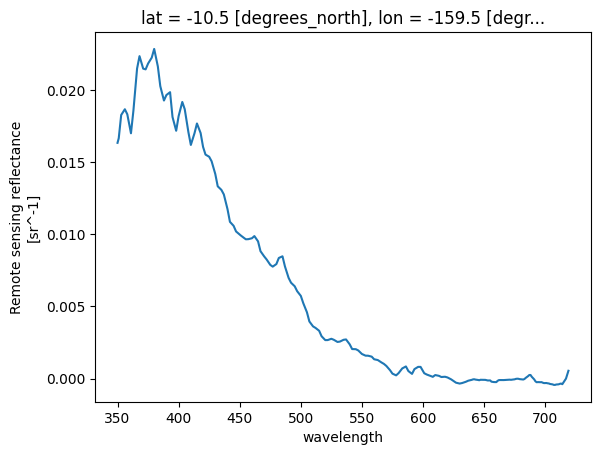

In [10]:
may_month.Rrs[100,20,:].plot()

In [11]:
# Load PCA loadings (calculated elsewhere) 
loadings_trun = pd.read_csv('/glusteruser/awindled/loadings_trun.csv', index_col=0) 
loadings_trun

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.055005,0.055595,0.056184,0.056776,0.057372,0.057974,0.058585,0.059204
1,-0.049796,-0.049860,-0.049911,-0.049952,-0.049987,-0.050018,-0.050051,-0.050215
2,0.098926,0.098782,0.098637,0.098496,0.098354,0.098211,0.098068,0.097807
3,-0.120409,-0.119454,-0.118471,-0.117459,-0.116416,-0.115342,-0.114230,-0.113238
4,0.123148,0.121144,0.119051,0.116859,0.114560,0.112167,0.109646,0.105997
...,...,...,...,...,...,...,...,...
396,0.006164,-0.000132,0.003332,-0.001595,0.000212,-0.005240,-0.000307,-0.002313
397,-0.001991,0.002591,0.001718,-0.001795,0.000579,-0.003002,0.000490,0.000445
398,0.003266,0.004642,0.002250,-0.003100,-0.004262,-0.000818,-0.003591,-0.000376
399,-0.002043,-0.000110,-0.001774,0.004298,-0.000565,0.003607,0.002535,-0.000262


In [12]:
may_rrs_stacked = may_month.Rrs.stack(z=("lat", "lon")).T
may_rrs_stacked

<xarray.DataArray 'Rrs' (z: 64800, wavelength: 401)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * wavelength  (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
  * z           (z) object MultiIndex
  * lat         (z) float32 89.5 89.5 89.5 89.5 89.5 ... -89.5 -89.5 -89.5 -89.5
  * lon         (z) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000
    display_scale:  linear
    display_min:    0.0
    display_max:    0.025

In [13]:
%%time
## Prediction of U (scores) of samples using the V (loadings) 
#of the training PCA

r_sum = []
for j in range(len(loadings_trun)):
    for i in range(len(may_rrs_stacked)):
        r = loadings_trun.iloc[:,j] * may_rrs_stacked[i,:].values
        r_sum.append(np.sum(r))

IndexError: single positional indexer is out-of-bounds

In [14]:
len(r_sum)

518400

In [15]:
518400/64800

8.0

In [16]:
#create table of scores for each Rrs spectra (pixel)
RrsU_mod = [r_sum[x:x+64800] for x in range(0, len(r_sum),64800)]
RrsU_mod = pd.DataFrame(np.array(RrsU_mod)).T
RrsU_mod = RrsU_mod.set_axis(loadings_trun.columns, axis=1)
RrsU_mod 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
RrsU_mod_reshape = RrsU_mod.values.reshape(180, 360, 8)
RrsU_mod_reshape.shape

(180, 360, 8)

In [18]:
for i in range(len(RrsU_mod.columns)):
    may_month['EOF_'+str(i+1)] = xr.DataArray(RrsU_mod_reshape[:,:,i], dims=('lat', 'lon'))
may_month 

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, wavelength: 401, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat         (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * wavelength  (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float64 nan nan nan nan ... nan nan nan
    palette     (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 105 0 0 0 0 0
    EOF_1       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_2       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_3       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_4       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_5       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_6       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_7       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    EOF_8       (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

In [19]:
EOFs = ['EOF_1', 'EOF_2', 'EOF_3', 'EOF_4', 'EOF_5', 'EOF_6', 'EOF_7', 'EOF_8'] 

for i in range(len(EOFs)):
    may_month[EOFs[i]] = may_month[EOFs[i]].where(may_month[EOFs[i]] != 0.0)
may_month

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, wavelength: 401, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat         (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * wavelength  (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float64 nan nan nan nan ... nan nan nan
    palette     (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 105 0 0 0 0 0
    EOF_1       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_2       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_3       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_4       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_5       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_6       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_7       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_8       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

In [20]:
print(may_month.EOF_1.min())
print(may_month.EOF_1.max())

print(may_month.EOF_2.min())
print(may_month.EOF_2.max())

print(may_month.EOF_3.min())
print(may_month.EOF_3.max())

print(may_month.EOF_4.min())
print(may_month.EOF_4.max())

<xarray.DataArray 'EOF_1' ()>
array(-0.02927037)
<xarray.DataArray 'EOF_1' ()>
array(0.043432)
<xarray.DataArray 'EOF_2' ()>
array(-0.00467307)
<xarray.DataArray 'EOF_2' ()>
array(0.04308723)
<xarray.DataArray 'EOF_3' ()>
array(-0.00573046)
<xarray.DataArray 'EOF_3' ()>
array(0.05508404)
<xarray.DataArray 'EOF_4' ()>
array(-0.00455588)
<xarray.DataArray 'EOF_4' ()>
array(0.03940571)


(array([6.0000e+00, 1.5000e+01, 4.4000e+01, 1.0090e+03, 2.7143e+04,
        2.9320e+03, 1.1800e+02, 5.8000e+01, 2.6000e+01, 1.4000e+01]),
 array([-0.02927037, -0.02200013, -0.0147299 , -0.00745966, -0.00018942,
         0.00708081,  0.01435105,  0.02162129,  0.02889152,  0.03616176,
         0.043432  ]),
 <BarContainer object of 10 artists>)

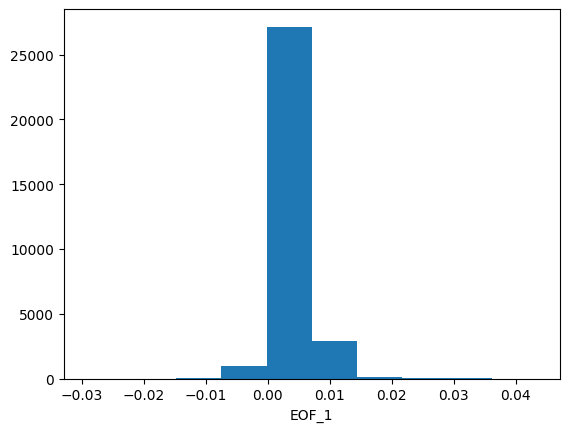

In [30]:
may_month.EOF_1.plot.hist()

In [47]:
def apply_MLR(phyto_csv_name, phyto_name):

    phyto = phyto_name
    print(phyto)

    phyto_csv = pd.read_csv('/glusteruser/awindled/PCC_MLR_csvs/' + phyto_csv_name + '.csv')
    
    vars = phyto_csv.selected_features.to_list()
    print(vars)
    
    rrs_xds_phyto = may_month[vars]
    rrs_xds_phyto_stacked = rrs_xds_phyto.stack(z=("lat", "lon"))
    #print(rrs_xds_phyto_stacked)
        
    pred_phyto = []
    for i in range(len(rrs_xds_phyto_stacked.z)):
        foo_all = []
        for j in range(len(phyto_csv.coefs_mn)):
            #print(rrs_xds_phyto_stacked[phyto_csv.selected_features[j]][i].values)
            foo = phyto_csv.coefs_mn[j] * rrs_xds_phyto_stacked[phyto_csv.selected_features[j]][i].values
            foo_all.append(foo)
            phyto_value = np.mean(phyto_csv.int) + np.sum(foo_all)
        pred_phyto.append(phyto_value)
    
    pred_phyto = np.array(pred_phyto)
    
    return pred_phyto


In [48]:
pred_log_chl = apply_MLR(phyto_csv_name='chl_no_envs', phyto_name='chl')
pred_log_dia = apply_MLR(phyto_csv_name='dia_no_envs', phyto_name='dia')
pred_log_coc = apply_MLR(phyto_csv_name='coc_no_envs', phyto_name='coc')
pred_log_cya = apply_MLR(phyto_csv_name='cya_no_envs', phyto_name='cya')
pred_log_din = apply_MLR(phyto_csv_name='din_no_envs', phyto_name='din')
pred_log_pha = apply_MLR(phyto_csv_name='pha_no_envs', phyto_name='pha')


chl
['EOF_1', 'EOF_3', 'EOF_5', 'EOF_6', 'EOF_8']
dia
['EOF_1', 'EOF_2', 'EOF_5', 'EOF_6', 'EOF_8']
coc
['EOF_1', 'EOF_4', 'EOF_5', 'EOF_6', 'EOF_8']
cya
['EOF_1', 'EOF_2', 'EOF_4', 'EOF_5', 'EOF_6', 'EOF_8']
din
['EOF_1', 'EOF_3', 'EOF_5', 'EOF_7', 'EOF_8']
pha
['EOF_1', 'EOF_4', 'EOF_5', 'EOF_7', 'EOF_8']


In [49]:
print(np.nanmin(pred_log_chl), np.nanmean(pred_log_chl), np.nanmax(pred_log_chl))
print(np.nanmin(pred_log_dia), np.nanmax(pred_log_dia))
print(np.nanmin(pred_log_coc), np.nanmax(pred_log_coc))
print(np.nanmin(pred_log_cya), np.nanmax(pred_log_cya))
print(np.nanmin(pred_log_din), np.nanmax(pred_log_din))
print(np.nanmin(pred_log_pha), np.nanmax(pred_log_pha))

-0.005696273296483088 0.005802455630949316 0.09859658358693887
-0.07150932450119134 0.09481267935599383
-0.02575073925043824 0.1153329279379626
-0.0678235875723094 0.15874090127437712
-0.05385683702079469 0.11068695641389242
-0.1297313131777677 0.11072685404428222


In [50]:
may_month_stacked = may_month.stack(z=("lat", "lon"))
may_month_stacked = may_month_stacked.assign(pred_log_chl=("z", pred_log_chl), pred_log_dia=("z", pred_log_dia),
                                             pred_log_coc=("z", pred_log_coc), pred_log_cya=("z", pred_log_cya),
                                             pred_log_din=("z", pred_log_din), pred_log_pha=("z", pred_log_pha))
may_month_stacked

<xarray.Dataset>
Dimensions:       (wavelength: 401, z: 64800, rgb: 3, eightbitcolor: 256)
Coordinates:
  * wavelength    (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
  * z             (z) object MultiIndex
  * lat           (z) float32 89.5 89.5 89.5 89.5 ... -89.5 -89.5 -89.5 -89.5
  * lon           (z) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Dimensions without coordinates: rgb, eightbitcolor
Data variables: (12/16)
    Rrs           (wavelength, z) float64 nan nan nan nan ... nan nan nan nan
    palette       (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 0 0 0 0 0
    EOF_1         (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    EOF_2         (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    EOF_3         (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    EOF_4         (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    pred_log_chl  (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_log_dia  (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_log_coc  (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_log_cya  (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_log_din  (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    pred_log_pha  (z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

In [51]:
may_month_unstacked = may_month_stacked.unstack()
may_month_unstacked

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360, wavelength: 401, rgb: 3,
                   eightbitcolor: 256)
Coordinates:
  * lat           (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon           (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * wavelength    (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
Dimensions without coordinates: rgb, eightbitcolor
Data variables: (12/16)
    Rrs           (wavelength, lat, lon) float64 nan nan nan nan ... nan nan nan
    palette       (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 0 0 0 0 0
    EOF_1         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_2         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_3         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_4         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    pred_log_chl  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_log_dia  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_log_coc  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_log_cya  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_log_din  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_log_pha  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

In [52]:
may_month_unstacked['pred_chl'] = 10**may_month_unstacked.pred_log_chl
may_month_unstacked['pred_dia'] = 10**may_month_unstacked.pred_log_dia
may_month_unstacked['pred_coc'] = 10**may_month_unstacked.pred_log_coc
may_month_unstacked['pred_cya'] = 10**may_month_unstacked.pred_log_cya
may_month_unstacked['pred_din'] = 10**may_month_unstacked.pred_log_din
may_month_unstacked['pred_pha'] = 10**may_month_unstacked.pred_log_pha
may_month_unstacked

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360, wavelength: 401, rgb: 3,
                   eightbitcolor: 256)
Coordinates:
  * lat           (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon           (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * wavelength    (wavelength) int64 350 351 352 353 354 ... 746 747 748 749 750
Dimensions without coordinates: rgb, eightbitcolor
Data variables: (12/22)
    Rrs           (wavelength, lat, lon) float64 nan nan nan nan ... nan nan nan
    palette       (rgb, eightbitcolor) uint8 147 0 108 144 0 111 ... 0 0 0 0 0
    EOF_1         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_2         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_3         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    EOF_4         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    ...            ...
    pred_chl      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_dia      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_coc      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_cya      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_din      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    pred_pha      (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/64)
    product_name:                      PACE_OCI.20240501_20240531.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/v1
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         31365
    data_minimum:                      -0.010000003
    data_maximum:                      0.10000001

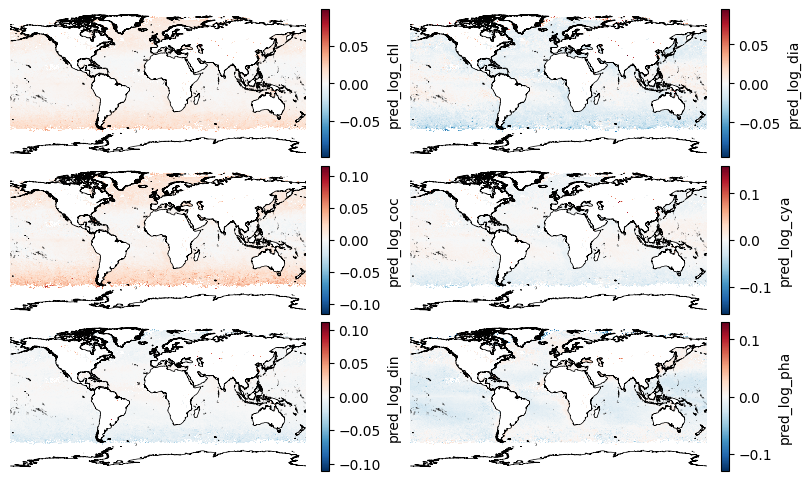

In [53]:
phyto_vars = ['pred_log_chl', 'pred_log_dia', 'pred_log_coc', 'pred_log_cya', 
              'pred_log_din', 'pred_log_pha'] 


myproj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, 
                        figsize=(8,6), layout='compressed', subplot_kw={'projection': myproj})
axs = axs.ravel()

for i in range(len(phyto_vars)):
    im = may_month_unstacked[phyto_vars[i]][:,:].plot(ax=axs[i], add_colorbar=False)
    plt.colorbar(im, ax=axs[i], label= phyto_vars[i])

for ax in axs:
    ax.set_title("")
    ax.set(xlabel=None, ylabel=None)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.coastlines(resolution='10m', linewidth=0.5)


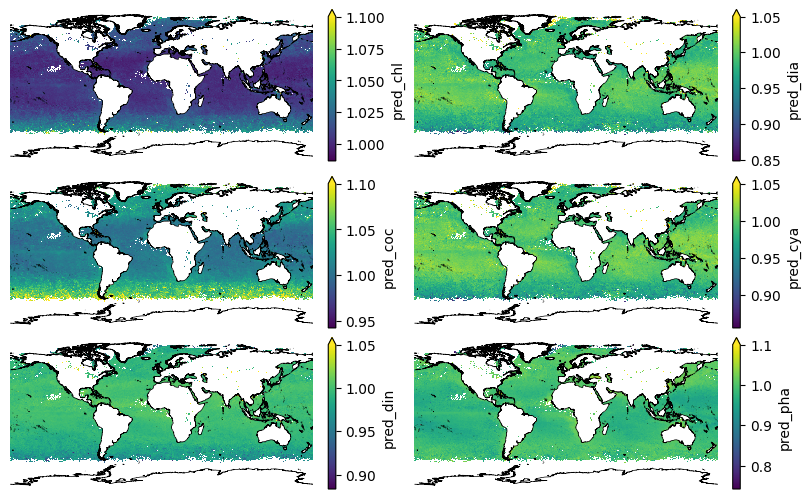

In [73]:
phyto_vars = ['pred_chl', 'pred_dia', 'pred_coc', 'pred_cya', 
              'pred_din', 'pred_pha'] 


myproj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, 
                        figsize=(8,6), layout='compressed', subplot_kw={'projection': myproj})
axs = axs.ravel()
'''
for i in range(len(phyto_vars)):
    im = may_month_unstacked[phyto_vars[i]][:,:].plot(ax=axs[i], add_colorbar=False)
    plt.colorbar(im, ax=axs[i], label= phyto_vars[i])
'''

may_month_unstacked.pred_chl[:,:].plot(ax=axs[0], vmax=1.1)
may_month_unstacked.pred_dia[:,:].plot(ax=axs[1], vmax=1.05)
may_month_unstacked.pred_coc[:,:].plot(ax=axs[2], vmax=1.1)
may_month_unstacked.pred_cya[:,:].plot(ax=axs[3], vmax=1.05)
may_month_unstacked.pred_din[:,:].plot(ax=axs[4], vmax=1.05)
may_month_unstacked.pred_pha[:,:].plot(ax=axs[5], vmax=1.1)


for ax in axs:
    ax.set_title("")
    ax.set(xlabel=None, ylabel=None)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.coastlines(resolution='10m', linewidth=0.5)


In [58]:
phyto_vars = ['pred_log_chl', 'pred_log_dia', 'pred_log_coc', 'pred_log_cya', 
              'pred_log_din', 'pred_log_pha']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in range(len(phyto_vars)):
    foo = may_month_unstacked[phyto_vars[i]].values.reshape(180*360)
    foo = scaler.fit_transform(foo.reshape(-1, 1))
    may_month_unstacked[phyto_vars[i]].values = foo.reshape(180,360)

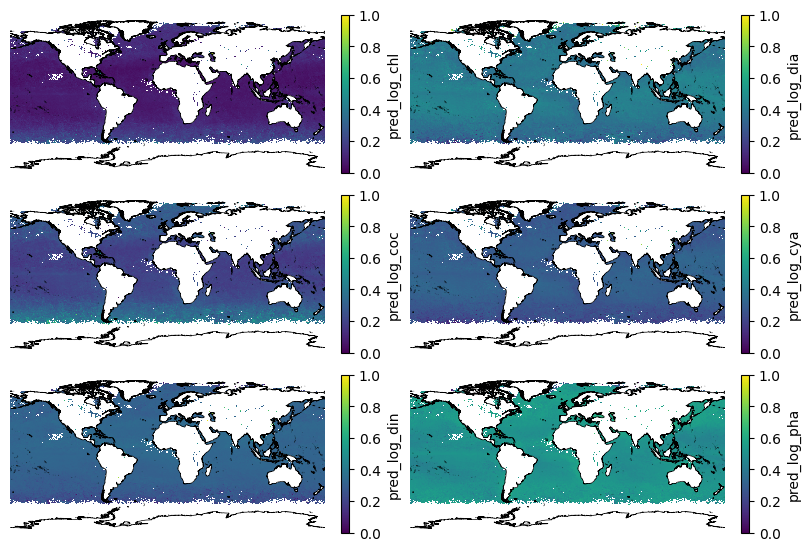

In [59]:
phyto_vars = ['pred_log_chl', 'pred_log_dia', 'pred_log_coc', 'pred_log_cya', 
              'pred_log_din', 'pred_log_pha'] 


myproj = ccrs.PlateCarree()
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, 
                        figsize=(8,6), layout='compressed', subplot_kw={'projection': myproj})
axs = axs.ravel()

for i in range(len(phyto_vars)):
    im = may_month_unstacked[phyto_vars[i]][:,:].plot(ax=axs[i], add_colorbar=False)
    plt.colorbar(im, ax=axs[i], label= phyto_vars[i])

for ax in axs:
    ax.set_title("")
    ax.set(xlabel=None, ylabel=None)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.coastlines(resolution='10m', linewidth=0.5)
